<a href="https://colab.research.google.com/github/ShaheerSyed/IGF1R_QSAR_modeling/blob/main/Copy_of_(SHS_11_08_2023)_IGF_1R_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performing Descriptor Calculation and Exploratory Data Analysis.**

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## **Import Common Libraries**

In [ ]:
import pandas as pd

## **Load bioactivity data**

In [ ]:
## Read-in the dataframes from dataset preparation.

Train_IGF1R_raw = pd.read_csv('/content/Train_IGF1R_raw.csv')
Test_gra_IGF1R_raw = pd.read_csv('/content/Test_gra_IGF1R_raw.csv')
Test_les_IGF1R_raw = pd.read_csv('/content/Test_les_IGF1R_raw.csv')

## **Cleaning 'canonical_smiles' via removing common salts.**

In [ ]:
## Installing Rdkit
!pip install rdkit

     |████████████████████████████████| 29.5 MB 48 kB/s 


In [ ]:
## Importing Necessary Libraries from Rdkit to perform 'canonical_smiles' cleaning.
from rdkit import Chem
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem import MolFromSmiles,MolToSmiles

In [ ]:
## https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/01_ER_alpha_preparation.ipynb

def clean_smiles(ListSMILEs):
    """
    Cleans SMILES strings by removing common salts.

    Parameters:
        ListSMILEs (list): A list of SMILES strings to be cleaned.

    Returns:
        list: A list of cleaned SMILES strings with salts removed.
    """

    # Create an instance of SaltRemover to remove common salts
    remover = SaltRemover()

    # Initialize an empty list to store cleaned SMILES strings
    SMILES_desalt = []

    # Iterate over each SMILES string in the input list
    for i in ListSMILEs:
        # Parse the SMILES string into a molecule object
        mol = MolFromSmiles(i)

        # Remove common salts from the molecule structure
        mol_desalt = remover.StripMol(mol)

        # Convert the desalted molecule back to a SMILES string
        mol_SMILES = MolToSmiles(mol_desalt)

        # Append the desalted SMILES string to the result list
        SMILES_desalt.append(mol_SMILES)

    # Return the list of cleaned SMILES strings
    return SMILES_desalt


In [ ]:
# Clean the 'canonical_smiles' in the Train_IGF1R DataFrame and add the cleaned SMILES to a new column 'SMILES_desalt'
Train_IGF1R_raw['SMILES_desalt'] = clean_smiles(Train_IGF1R_raw.canonical_smiles)

# Clean the 'canonical_smiles' in the Test_gra_IGF1R DataFrame and add the cleaned SMILES to a new column 'SMILES_desalt'
Test_gra_IGF1R_raw['SMILES_desalt'] = clean_smiles(Test_gra_IGF1R_raw.canonical_smiles)

# Clean the 'canonical_smiles' in the Test_les_IGF1R DataFrame and add the cleaned SMILES to a new column 'SMILES_desalt'
Test_les_IGF1R_raw['SMILES_desalt'] = clean_smiles(Test_les_IGF1R_raw.canonical_smiles)

In [ ]:
## Checking for duplicate 'SMILES_desalt'. Removing if found.

# Remove duplicate SMILES and keep the last occurrence for Train_ER_alpha
Train_IGF1R = Train_IGF1R_raw.drop_duplicates(subset='SMILES_desalt', keep='last')

# Print the reduction in the number of SMILES strings for Train_ER_alpha
print("RAW data of " + str(len(Train_IGF1R_raw)) + " SMILES has been reduced to " + str(len(Train_IGF1R)) + " SMILES.")

# Remove duplicate SMILES and keep the last occurrence for Test_gra_ER_alpha
Test_gra_IGF1R = Test_gra_IGF1R_raw.drop_duplicates(subset='SMILES_desalt', keep='last')

# Print the reduction in the number of SMILES strings for Test_gra_ER_alpha
print("RAW data of " + str(len(Test_gra_IGF1R_raw)) + " SMILES has been reduced to " + str(len(Test_gra_IGF1R)) + " SMILES.")

# Remove duplicate SMILES and keep the last occurrence for Test_les_ER_alpha
Test_les_IGF1R = Test_les_IGF1R_raw.drop_duplicates(subset='SMILES_desalt', keep='last')

# Print the reduction in the number of SMILES strings for Test_les_ER_alpha
print("RAW data of " + str(len(Test_les_IGF1R_raw)) + " SMILES has been reduced to " + str(len(Test_les_IGF1R)) + " SMILES.")



RAW data of 1830 SMILES has been reduced to 1830 SMILES.
RAW data of 506 SMILES has been reduced to 506 SMILES.
RAW data of 402 SMILES has been reduced to 402 SMILES.


## **Further Cleaning of Smiles Notations**

The following code essentially processes the SMILES notation to clean even further. It splits the SMILES strings at the '.' character to separate different components within a compound. The code then retains the longest compound, as it is often the most significant part of the SMILES string and can be most useful for chemical analysis.

In [ ]:
# Define a function to process and clean SMILES strings further, as explained above.

def further_clean_smiles(df):

    # Remove the 'SMILES_desalt' column from the DataFrame, creating a new DataFrame 'df_no_smiles'.
    df_no_smiles = df.drop(columns='SMILES_desalt')

    # Initialize an empty list 'smiles' to store the processed 'SMILES_desalt' values.
    smiles = []

    # Loop through each 'SMILES_desalt' value in the original DataFrame 'df' and process them.
    for i in df.SMILES_desalt.tolist():
        # Split the 'SMILES_desalt' value into multiple compounds (if separated by a period '.').
        cpd = str(i).split('.')
        # Find the longest compound in the list of compounds using 'max' with the 'key' set to 'len'.
        cpd_longest = max(cpd, key=len)
        # Append the longest compound to the 'smiles' list.
        smiles.append(cpd_longest)

    # Create a pandas Series 'smiles' with the processed 'SMILES_desalt' values and name it 'SMILES_desalt' again.
    smiles = pd.Series(smiles, name='SMILES_desalt')

    # Concatenate the 'df_no_smiles' DataFrame and the 'smiles' Series along the columns (axis=1).
    df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)

    return df_clean_smiles

# Apply the clean_smiles function to each of the DataFrames
Train_IGF1R_clean = further_clean_smiles(Train_IGF1R)
Test_gra_IGF1R_clean = further_clean_smiles(Test_gra_IGF1R)
Test_les_IGF1R_clean = further_clean_smiles(Test_les_IGF1R)


In [ ]:
# Dropping unnecessary columns that we do not need it anymore. Rename 'SMILES_desalt' to 'smiles_cleaned' for each DataFrame (more easily readable).

# List of columns to drop
columns_to_drop = ['canonical_smiles', 'assay_type', 'standard_type', 'standard_relation', 'standard_units']

# Drop the specified columns and rename 'SMILES_desalt' to 'smiles_cleaned' for each DataFrame

Train_IGF1R_clean = Train_IGF1R_clean.drop(columns=columns_to_drop)
Train_IGF1R_clean = Train_IGF1R_clean.rename(columns={'SMILES_desalt': 'smiles_cleaned'})

Test_gra_IGF1R_clean = Test_gra_IGF1R_clean.drop(columns=columns_to_drop)
Test_gra_IGF1R_clean = Test_gra_IGF1R_clean.rename(columns={'SMILES_desalt': 'smiles_cleaned'})

Test_les_IGF1R_clean = Test_les_IGF1R_clean.drop(columns=columns_to_drop)
Test_les_IGF1R_clean = Test_les_IGF1R_clean.rename(columns={'SMILES_desalt': 'smiles_cleaned'})



In [ ]:
## Take a look at the Train_IGF1R dataframe.
Train_IGF1R_clean.head(1)

In [ ]:
## Take a look at the Test_gra_IGF1R dataframe.
Test_gra_IGF1R_clean.head(1)

In [ ]:
## Take a look at the Test_les_IGF1R dataframe.
Test_les_IGF1R_clean.head(1)

## **Save processed and cleaned files.**

In [ ]:
import os

# Create the 'model' directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

# Create the 'model' directory if it doesn't exist
if not os.path.exists('smiles'):
    os.makedirs('smiles')

In [ ]:
# Save the cleaned Train_IGF1R_clean, Test_gra_IGF1R_clean, and Test_les_IGF1R_clean DataFrames as CSV files
Train_IGF1R_clean.to_csv('model/Train_IGF1R.csv', sep=',', index=False)
Test_gra_IGF1R_clean.to_csv('model/Test_gra_IGF1R.csv', sep=',', index=False)
Test_les_IGF1R_clean.to_csv('model/Test_les_IGF1R.csv', sep=',', index=False)

# Extract 'smiles_cleaned' and 'molecule_chembl_id' columns from Train_IGF1R_clean, Test_gra_IGF1R_clean, and Test_les_IGF1R_clean
Train_smiles = Train_IGF1R_clean[['smiles_cleaned', 'molecule_chembl_id']]
Test_gra = Test_gra_IGF1R_clean[['smiles_cleaned', 'molecule_chembl_id']]
Test_les = Test_les_IGF1R_clean[['smiles_cleaned', 'molecule_chembl_id']]

# Save the SMILES in a .smi file without column headers for Train_IGF1R, Test_gra_IGF1R, and Test_les_IGF1R
Train_smiles.to_csv('smiles/Train_IGF1R.smi', sep='\t', header=False, index=False)
Test_gra.to_csv('smiles/Test_gra_IGF1R.smi', sep='\t', header=False, index=False)
Test_les.to_csv('smiles/Test_les_IGF1R.smi', sep='\t', header=False, index=False)

# Extract 'molecule_chembl_id' and 'value' columns from Train_IGF1R_clean and save as Train_QSAR.csv
Train_QSAR = Train_IGF1R_clean[['molecule_chembl_id', 'standard_value']]
Train_QSAR.to_csv('Train_QSAR.csv', sep=',', index=False)


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

# Define a function named 'lipinski' that calculates Lipinski descriptors for chemical compounds.
# It takes a list of SMILES representations of compounds as input, and can display verbose output if specified.

def lipinski(smiles, verbose=False):

    # Create an empty list 'moldata' to store RDKit Mol objects for each compound.
    moldata = []

    # Iterate over the SMILES representations in the input 'smiles' list.
    for elem in smiles:
        # Convert the SMILES representation to an RDKit Mol object and add it to 'moldata'.
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    # Create an empty NumPy array 'baseData' for storing computed descriptor values.
    baseData = np.arange(1, 1)
    i = 0

    # Iterate over the RDKit Mol objects in 'moldata' to compute Lipinski descriptors.
    for mol in moldata:

        # Calculate four Lipinski descriptors for the compound.
        desc_MolWt = Descriptors.MolWt(mol)  # Molecular weight
        desc_MolLogP = Descriptors.MolLogP(mol)  # LogP (partition coefficient)
        desc_NumHDonors = Lipinski.NumHDonors(mol)  # Number of hydrogen bond donors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)  # Number of hydrogen bond acceptors

        # Create a NumPy array 'row' containing the computed descriptor values.
        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

        # If it's the first descriptor, assign 'row' to 'baseData', otherwise append 'row' to 'baseData'.
        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    # Define the column names for the descriptor values.
    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]

    # Create a pandas DataFrame 'descriptors' with the computed descriptor values and column names.
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    # Return the computed Lipinski descriptors as a DataFrame.
    return descriptors


In [ ]:
## Read-in the cleaned dataframes.

Train_IGF1R = pd.read_csv('/content/model/Train_IGF1R.csv')
Test_gra_IGF1R = pd.read_csv('/content/model/Test_gra_IGF1R.csv')
Test_les_IGF1R = pd.read_csv('/content/model/Test_les_IGF1R.csv')

## Calculate the Lipinski Descriptors

Train_IGF1R_lipinski = lipinski(Train_IGF1R['smiles_cleaned'])
Test_gra_IGF1R_lipinski = lipinski(Test_gra_IGF1R['smiles_cleaned'])
Test_les_IGF1R_lipinski = lipinski(Test_les_IGF1R['smiles_cleaned'])

### **Combine Lipinksi and Original DataFrames**



In [ ]:

# Combine Train_IGF1R with the Train_IGF1R_lipinski dataframe by concatenating them horizontally (axis=1)
Train_IGF1R_combined = pd.concat([Train_IGF1R, Train_IGF1R_lipinski], axis=1)

# Combine Test_gra_IGF1R with the Test_gra_IGF1R_lipinski dataframe by concatenating them horizontally (axis=1)
Test_gra_IGF1R_combined = pd.concat([Test_gra_IGF1R, Test_gra_IGF1R_lipinski], axis=1)

# Combine Test_les_IGF1R with the Test_les_IGF1R_lipinski dataframe by concatenating them horizontally (axis=1)
Test_les_IGF1R_combined = pd.concat([Test_les_IGF1R, Test_les_IGF1R_lipinski], axis=1)


In [ ]:
# Take a look at Train_IGF1R_combined
Train_IGF1R_combined.head(3)
Train_IGF1R_combined.shape

(1830, 8)

In [ ]:
# Take a look at Test_gra_IGF1R_combined
Test_gra_IGF1R_combined.head(3)
Test_gra_IGF1R_combined.shape

(506, 8)

In [ ]:
# Take a look at Test_les_IGF1R_combined
Test_les_IGF1R_combined.head(3)
Test_les_IGF1R_combined.shape

(402, 8)

**Visualizing Lipinski Descriptors for Each Dataframe.**

In [ ]:
# Create the 'results' directory if it doesn't exist
if not os.path.exists('results'):
    os.makedirs('results')

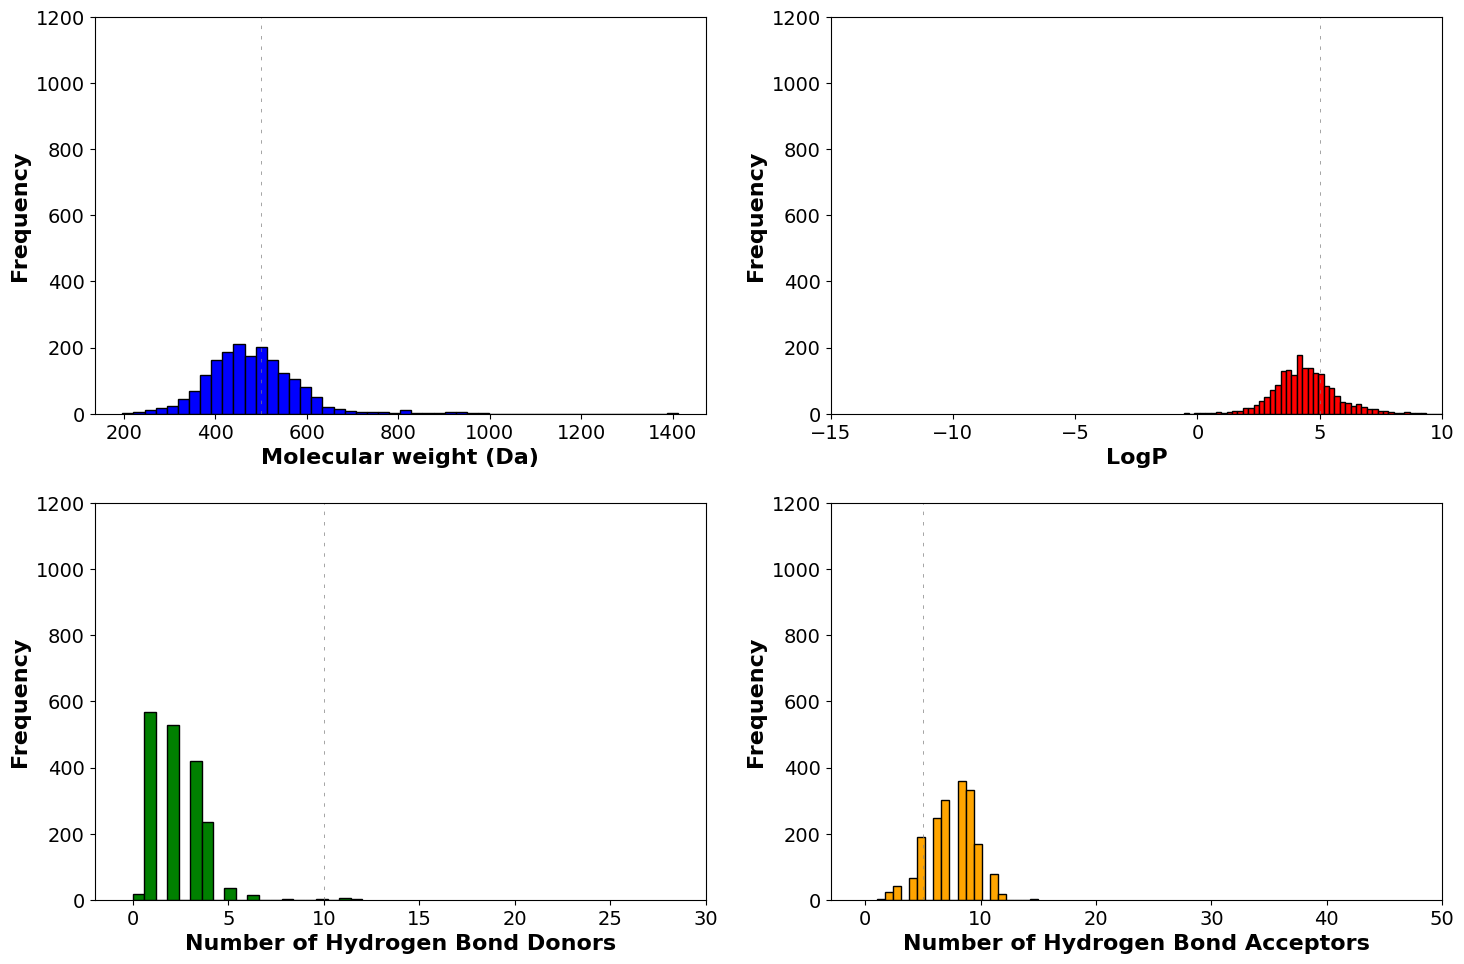

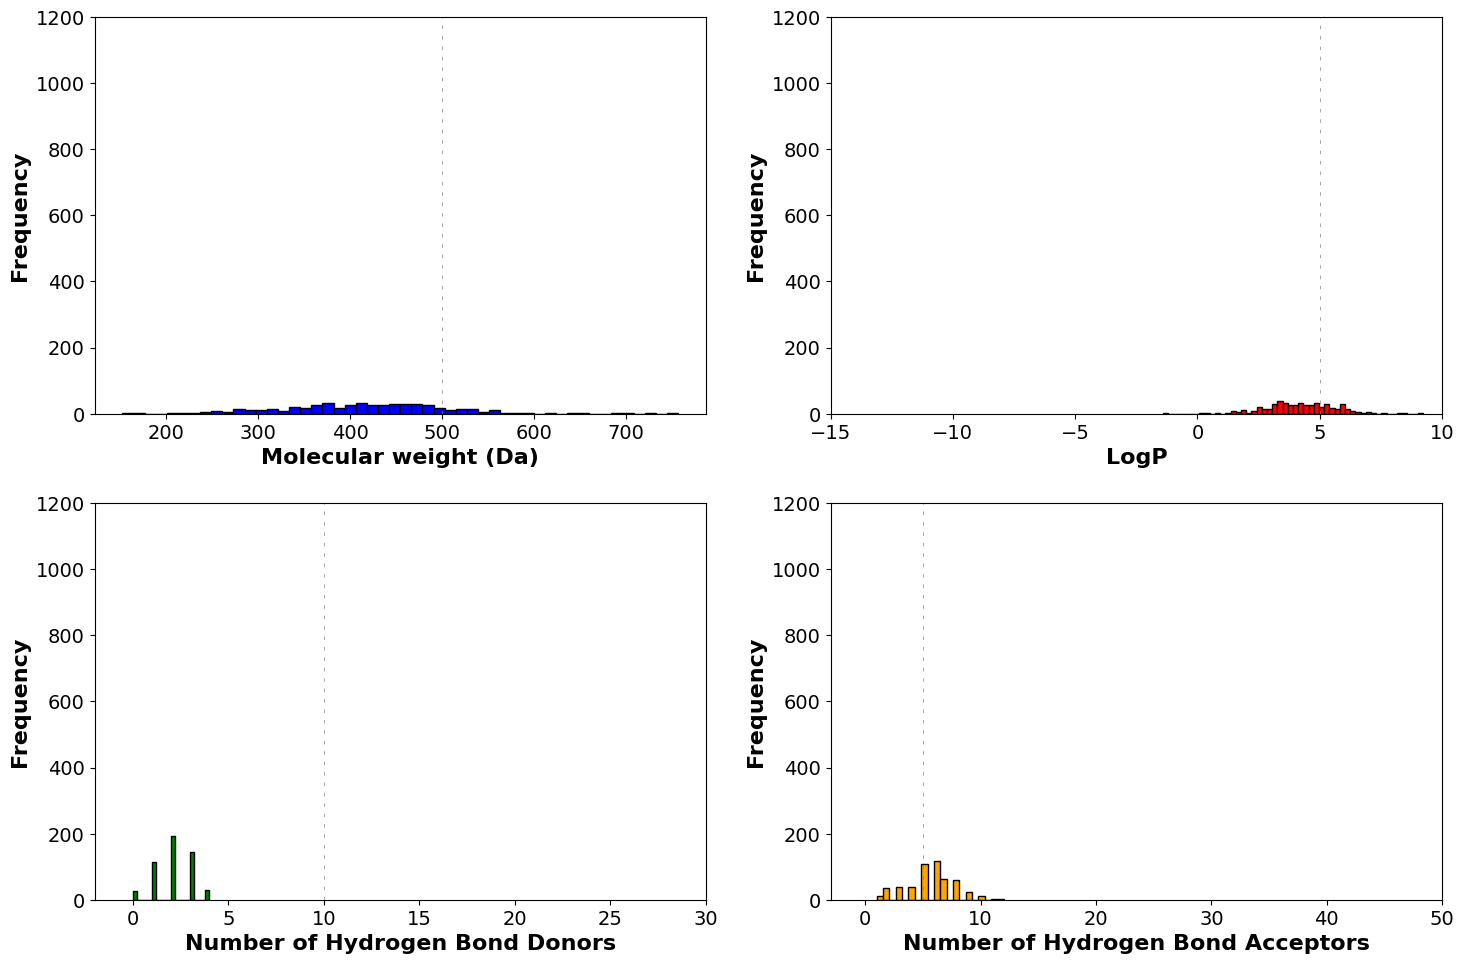

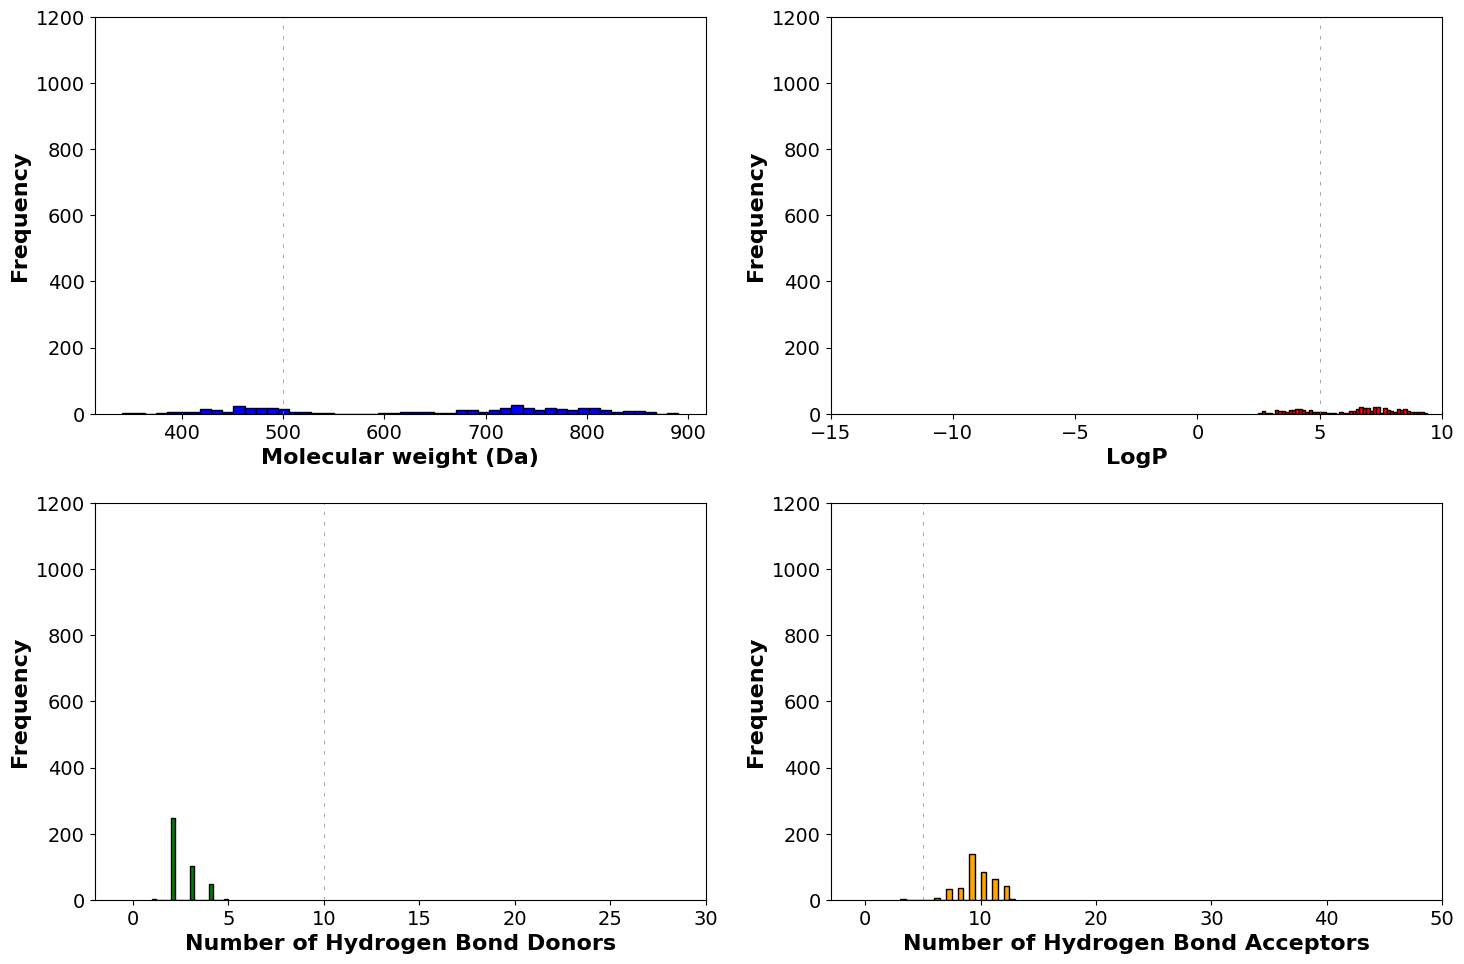

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

dataframes = [Train_IGF1R_combined, Test_gra_IGF1R_combined, Test_les_IGF1R_combined]

for idx, df_combined in enumerate(dataframes):
    MW = df_combined['MW']
    LogP = df_combined['LogP']
    nHDonors = df_combined['NumHDonors']
    nHAcceptors = df_combined['NumHAcceptors']

    figure, ((plt1, plt2), (plt3, plt4)) = plt.subplots(2, 2)
    figure.set_size_inches(15, 10)

    # Histogram for MW
    hist, bins = np.histogram(MW, 50)
    width = 1 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt1.bar(center, hist, align='center', width=width, color='blue', edgecolor='black',
             error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
    plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
    plt1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
    plt1.tick_params(axis='both', which='major', labelsize=14)
    plt1.set_ylim(0, 1200)
    plt1.axvline(500, color='gray', linestyle='--', dashes=(5, 10), linewidth=0.5)

    # Histogram for LogP
    hist, bins = np.histogram(LogP, 50)
    width = 1 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt2.bar(center, hist, align='center', width=width, color='red', edgecolor='black',
             error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
    plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
    plt2.set_ylabel('Frequency', fontsize=16, fontweight='bold')
    plt2.tick_params(axis='both', which='major', labelsize=14)
    plt2.set_xlim(-15, 10)
    plt2.set_ylim(0, 1200)
    plt2.axvline(5, color='gray', linestyle='--', dashes=(5, 10), linewidth=0.5)

    # Histogram for nHDonors
    hist, bins = np.histogram(nHDonors, 20)
    width = 1 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt3.bar(center, hist, align='center', width=width, color='green', edgecolor='black',
             error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
    plt3.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
    plt3.set_ylabel('Frequency', fontsize=16, fontweight='bold')
    plt3.tick_params(axis='both', which='major', labelsize=14)
    plt3.set_xlim(-2, 30)
    plt3.set_ylim(0, 1200)
    plt3.axvline(10, color='gray', linestyle='--', dashes=(5, 10), linewidth=0.5)

    # Histogram for nHAcceptors
    hist, bins = np.histogram(nHAcceptors, 20)
    width = 1 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt4.bar(center, hist, align='center', width=width, color='orange', edgecolor='black',
             error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
    plt4.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
    plt4.set_ylabel('Frequency', fontsize=16, fontweight='bold')
    plt4.tick_params(axis='both', which='major', labelsize=14)
    plt4.set_xlim(-3, 50)
    plt4.set_ylim(0, 1200)
    plt4.axvline(5, color='gray', linestyle='--', dashes=(5, 10), linewidth=0.5)

    plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
    plt.savefig(f'results/lipinski_histogram_plots_{idx}.pdf', dpi=300)


In [ ]:
## Re-naming Lipinski Histogram Plot Files.

import os

# Define the paths to the existing files and the new file names
files = [
    ('/content/results/lipinski_histogram_plots_0.pdf', '/content/results/Train_IGF1R_lipinski_histogram_plots.pdf'),
    ('/content/results/lipinski_histogram_plots_1.pdf', '/content/results/Test_gra_IGF1R_lipinski_histogram_plots.pdf'),
    ('/content/results/lipinski_histogram_plots_2.pdf', '/content/results/Test_les_IGF1R_lipinski_histogram_plots.pdf')
]

# Rename the files
for old_path, new_path in files:
    os.rename(old_path, new_path)

print("Files renamed successfully.")

Files renamed successfully.


## **Visualize the Relationship between the Features**



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Define a function to create feature relationship plots and save them
def save_feature_relationship_plots(dataframe, dataframe_name):
    # Pairplot
    pairplot = sns.pairplot(dataframe, vars=["MW", "LogP", "NumHDonors", "NumHAcceptors", "standard_value"], diag_kind='kde', hue='bioactivity_status')
    pairplot.fig.suptitle(f'Pairplot of Features for {dataframe_name}', y=1.02)

    # Heatmap
    heatmap_features = ["MW", "LogP", "NumHDonors", "NumHAcceptors", "standard_value"]
    correlation_matrix = dataframe[heatmap_features].corr()

    plt.figure(figsize=(15, 8))  # Adjust the size of the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap of Features for {dataframe_name}')

    # Save plots to the results folder in the same PDF file
    pdf_path = f'/content/results/{dataframe_name}_feature_relationship_plots.pdf'

    with PdfPages(pdf_path) as pdf:
        pdf.savefig(pairplot.fig)
        plt.close(pairplot.fig)

        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

# Call the function for each dataframe
save_feature_relationship_plots(Train_IGF1R_combined, 'Train_IGF1R')
save_feature_relationship_plots(Test_gra_IGF1R_combined, 'Test_gra_IGF1R')
save_feature_relationship_plots(Test_les_IGF1R_combined, 'Test_les_IGF1R')


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

## Defining Functions to perform data normalization of the 'standard_value' column.

# Define a function to convert 'standard_value' to 'pIC50' and update the DataFrame
def pIC50(input):
    pIC50 = []

    # Iterate over 'standard_value_norm' and convert from nM to M, then calculate -log10
    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))

    # Create a new 'pIC50' column and drop 'standard_value_norm'
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

# Define a function to normalize 'standard_value' and update the DataFrame
def norm_value(input):
    norm = []

    # Iterate over 'standard_value' and set values greater than 100,000,000 to 100,000,000
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    # Create a new 'standard_value_norm' column and drop 'standard_value'
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x


In [ ]:
# Apply transformations to Train_IGF1R_combined
df_norm_train_igf1r = norm_value(Train_IGF1R_combined)
df_final_train_igf1r = pIC50(df_norm_train_igf1r)

# Apply transformations to Test_gra_IGF1R_combined
df_norm_test_gra_igf1r = norm_value(Test_gra_IGF1R_combined)
df_final_test_gra_igf1r = pIC50(df_norm_test_gra_igf1r)

# Apply transformations to Test_les_IGF1R_combined
df_norm_test_les_igf1r = norm_value(Test_les_IGF1R_combined)
df_final_test_les_igf1r = pIC50(df_norm_test_les_igf1r)

<ipython-input-62-78a7ce70135f>:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)
<ipython-input-62-78a7ce70135f>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)
<ipython-input-62-78a7ce70135f>:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)
<ipython-input-62-78a7ce70135f>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)
<ipython-input-62-78a7ce70135f>:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

In [ ]:
## Looking at data before normalization transformation.

print('\nOriginal data before any normalization\n')

print('\nTrain_IGF1R_combined\n')
print(Train_IGF1R_combined.standard_value.describe())

print('\nTest_gra_IGF1R_combined\n')
print(Test_gra_IGF1R_combined.standard_value.describe())

print('\nTest_les_IGF1R_combined\n')
print(Test_les_IGF1R_combined.standard_value.describe())

## Looking at data after normalization transformation.

print('\nAfter normalization transformation\n')

print('\nTrain_IGF1R_combined\n')
print(df_norm_train_igf1r.standard_value_norm.describe())

print('\nTest_gra_IGF1R_combined\n')
print(df_norm_test_gra_igf1r.standard_value_norm.describe())

print('\nTest_les_IGF1R_combined\n')
print(df_norm_test_les_igf1r.standard_value_norm.describe())

## Looking at data after pIC50 transformation.

print('\nFinal transformed data after applying the pIC50 transformation\n')

print('\nTrain_IGF1R_combined\n')
print(df_final_train_igf1r.pIC50.describe())

print('\nTest_gra_IGF1R_combined\n')
print(df_final_test_gra_igf1r.pIC50.describe())

print('\nTest_les_IGF1R_combined\n')
print(df_final_test_les_igf1r.pIC50.describe())



Original data before any normalization


Train_IGF1R_combined

count    1.830000e+03
mean     2.709531e+04
std      6.981771e+05
min      5.000000e-02
25%      9.000000e+00
50%      5.000000e+01
75%      5.000000e+02
max      2.200000e+07
Name: standard_value, dtype: float64

Test_gra_IGF1R_combined

count        506.000000
mean       38437.534822
std       104449.390287
min           10.000000
25%         5000.000000
50%        10000.000000
75%        30000.000000
max      1000000.000000
Name: standard_value, dtype: float64

Test_les_IGF1R_combined

count     402.000000
mean       83.101493
std        52.228881
min         0.200000
25%        50.000000
50%       100.000000
75%       100.000000
max      1000.000000
Name: standard_value, dtype: float64

After normalization transformation


Train_IGF1R_combined

count    1.830000e+03
mean     2.709531e+04
std      6.981771e+05
min      5.000000e-02
25%      9.000000e+00
50%      5.000000e+01
75%      5.000000e+02
max      2.200000e+07
N

The transformation from 'standard_value' to 'pIC50' has made the data more interpretable, as it now represents compound potencies on a common scale, with higher values indicating higher potency. The transformation allows for easier comparison and analysis of compound effectiveness in different dataframes.

In [ ]:
## Take a quick look at the data.
df_final_train_igf1r.head(1)


,molecule_chembl_id,bioactivity_status,smiles_cleaned,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL327725,intermediate,CC(O)C(/N=C1/C=C(O)/C(=N\C(C(=O)O)C(C)O)C=C1O)...,342.304,-0.5662,6.0,8.0,5.221849


## **Save all resultant pIC50 dataframes to CSV file.**

In [ ]:
# Save the processed pIC50 dataframes as CSV files
df_final_train_igf1r.to_csv('/content/model/Train_IGF1R_processed_pIC50.csv', sep=',', index=False)
df_final_test_gra_igf1r.to_csv('/content/model/Test_gra_IGF1R_processed_pIC50.csv', sep=',', index=False)
df_final_test_les_igf1r.to_csv('/content/model/Test_les_IGF1R_processed_pIC50.csv', sep=',', index=False)


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [ ]:
# Read in the CSV files to dataframes
Train_IGF1R_processed = pd.read_csv('/content/model/Train_IGF1R_processed_pIC50.csv')
Test_gra_IGF1R_processed = pd.read_csv('/content/model/Test_gra_IGF1R_processed_pIC50.csv')
Test_les_IGF1R_processed = pd.read_csv('/content/model/Test_les_IGF1R_processed_pIC50.csv')

# Create a dictionary of dataframes
dfs = {
    'Train_IGF1R_processed': Train_IGF1R_processed,
    'Test_gra_IGF1R_processed': Test_gra_IGF1R_processed,
    'Test_les_IGF1R_processed': Test_les_IGF1R_processed
}

### **Frequency plot of the bioactivity classes**

In [ ]:
def plot_countplot(df, filename):
    sns.set(style='ticks')
    plt.figure(figsize=(5.5, 5.5))
    sns.countplot(x='bioactivity_status', data=df, edgecolor='black')
    plt.xlabel('Bioactivity Status', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.savefig(f'/content/results/{filename}.pdf')


### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

In [ ]:
def plot_scatterplot(df, filename):
    plt.figure(figsize=(5.5, 5.5))
    sns.scatterplot(x='MW', y='LogP', data=df, hue='bioactivity_status', size='pIC50', edgecolor='black', alpha=0.7)
    plt.xlabel('MW', fontsize=14, fontweight='bold')
    plt.ylabel('LogP', fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.savefig(f'/content/results/{filename}.pdf')


### **Box plots**

#### **pIC50 value**

In [ ]:
def plot_boxplot(df, filename):
    plt.figure(figsize=(5.5, 5.5))
    sns.boxplot(x='bioactivity_status', y='pIC50', data=df)
    plt.xlabel('Bioactivity Status', fontsize=14, fontweight='bold')
    plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
    plt.savefig(f'/content/results/{filename}.pdf')


**Run the three functions above to generate plots.**

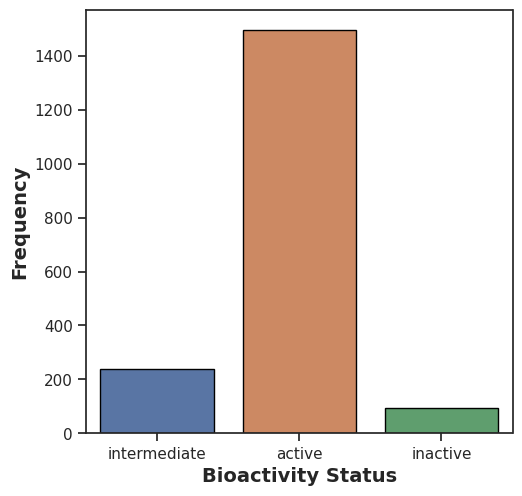

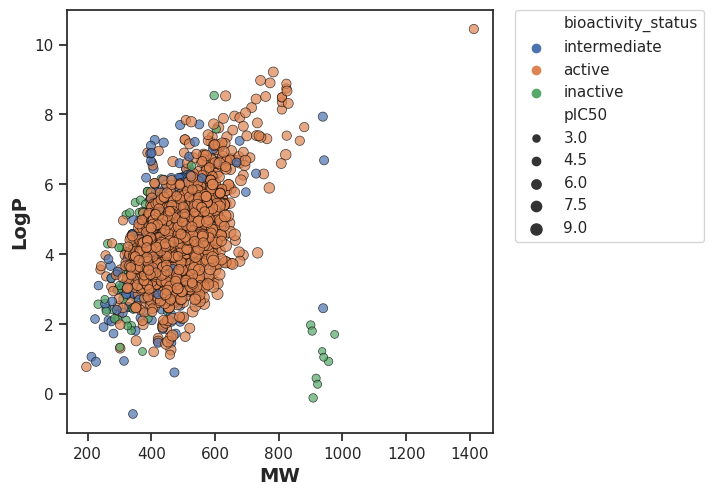

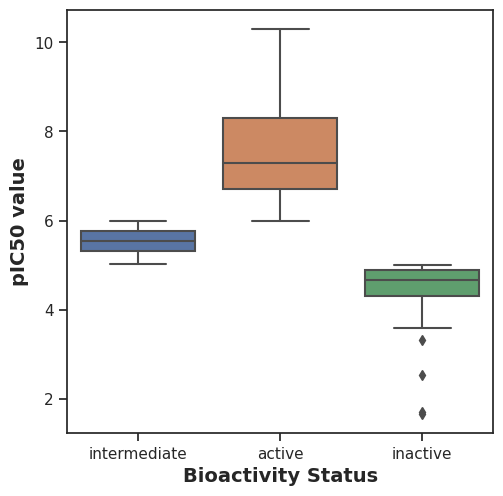

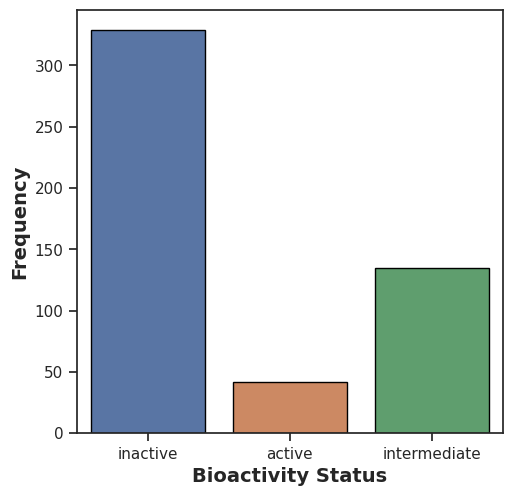

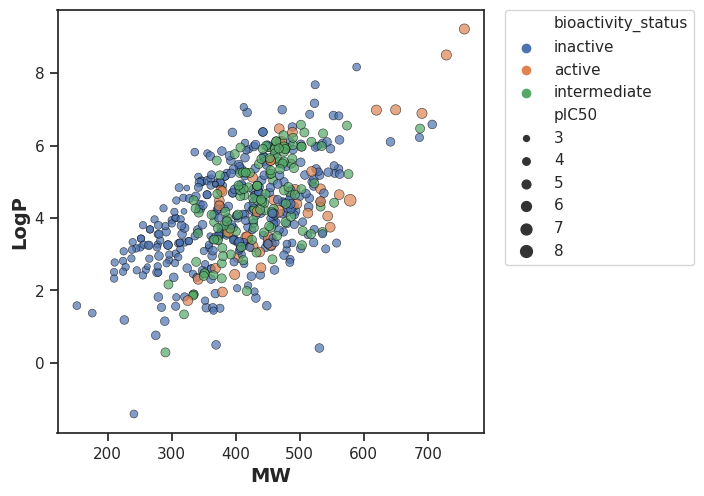

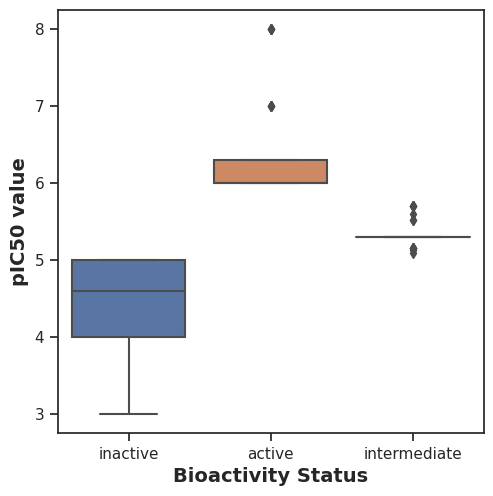

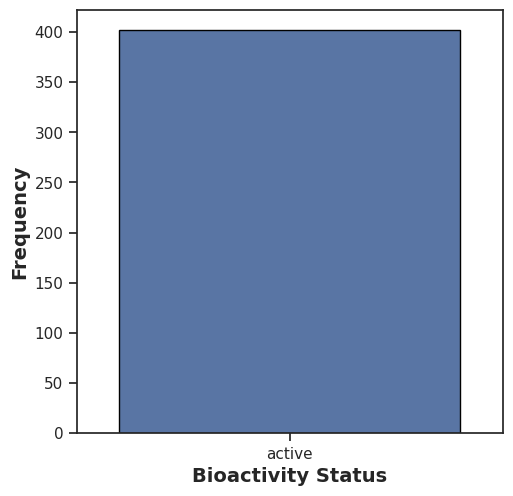

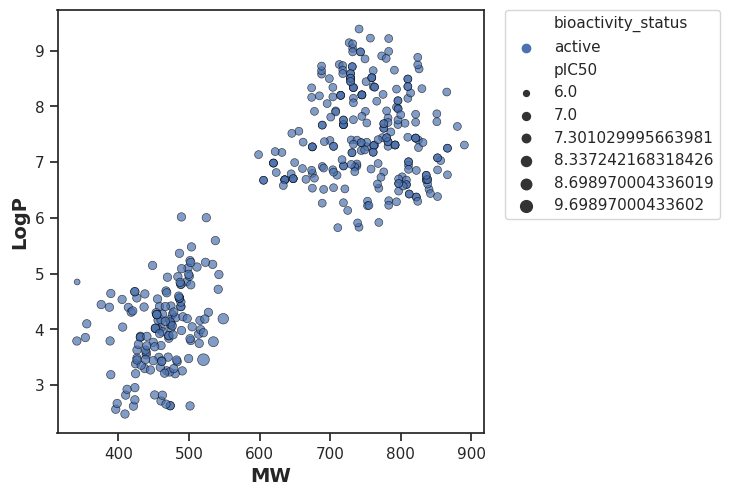

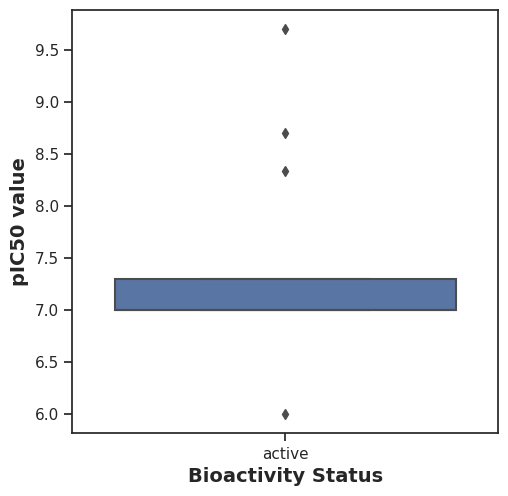

In [ ]:
# Loop through dataframes and create and save plots
for df_name, df in dfs.items():
    plot_countplot(df, f'plot_bioactivity_class_{df_name}')
    plot_scatterplot(df, f'plot_MW_vs_LogP_{df_name}')
    plot_boxplot(df, f'plot_pIC50_{df_name}')

*From the plots above, it seems like that the test_les_igf1r_processed dataframe only has data of bioactivity_status == active. Lets double check to see if this is correct.*

In [ ]:
# Confirm the value counts of the 'bioactivity_status' column
Test_les_IGF1R_processed['bioactivity_status'].value_counts() # Seem's right. Any potential implications ?

active    402
Name: bioactivity_status, dtype: int64

## **Statistical analysis | Mann-Whitney U Test**

Analyzing Train_IGF1R_processed...
Train_IGF1R_processed analysis completed.

Analyzing Test_gra_IGF1R_processed...
Test_gra_IGF1R_processed analysis completed.

Analyzing Test_les_IGF1R_processed...
Skipping pIC50 for Test_les_IGF1R_processed: Not enough data for Mann-Whitney U test.
Skipping MW for Test_les_IGF1R_processed: Not enough data for Mann-Whitney U test.
Skipping LogP for Test_les_IGF1R_processed: Not enough data for Mann-Whitney U test.
Skipping NumHDonors for Test_les_IGF1R_processed: Not enough data for Mann-Whitney U test.
Skipping NumHAcceptors for Test_les_IGF1R_processed: Not enough data for Mann-Whitney U test.
Test_les_IGF1R_processed analysis completed.

Analysis for all dataframes completed.


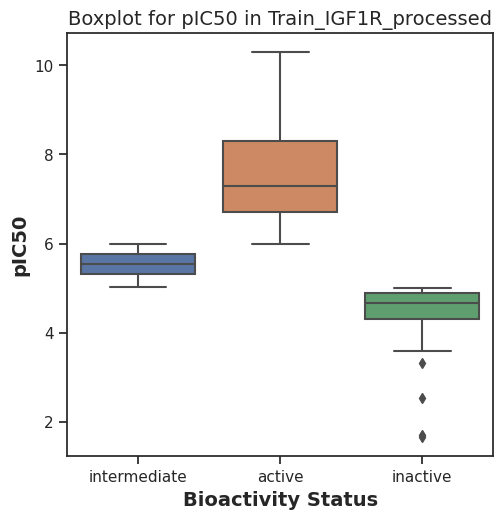

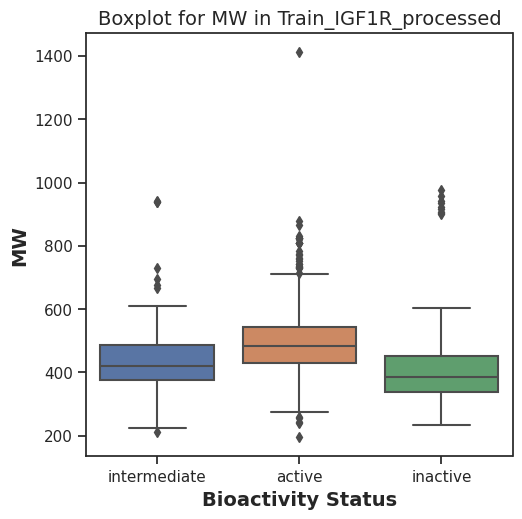

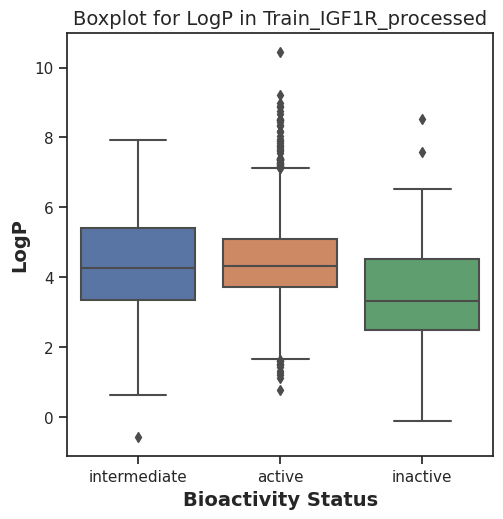

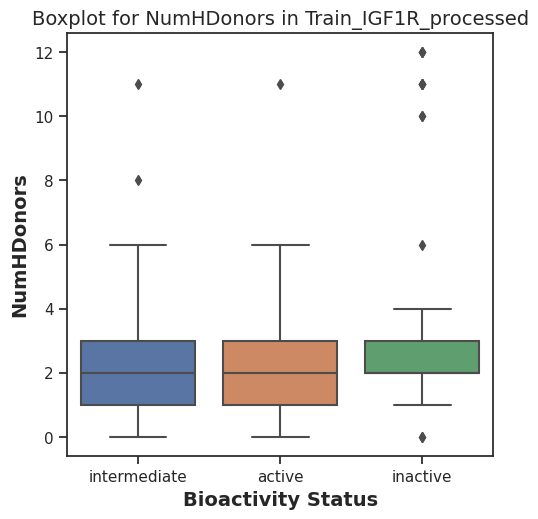

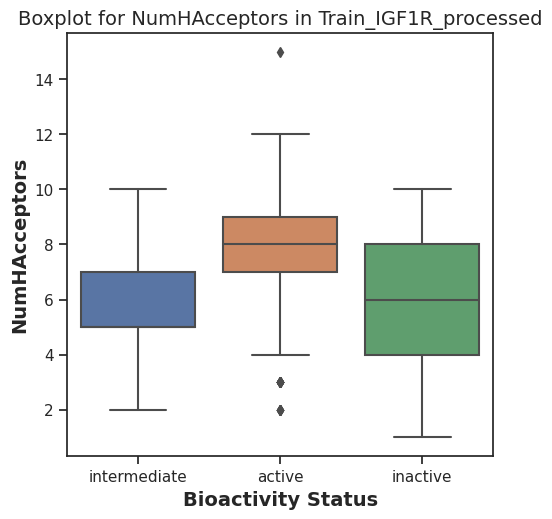

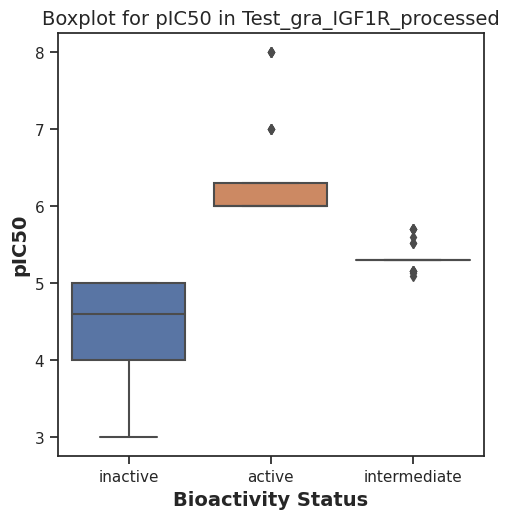

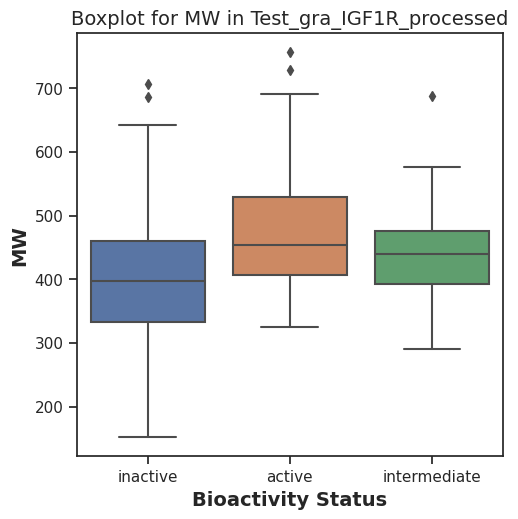

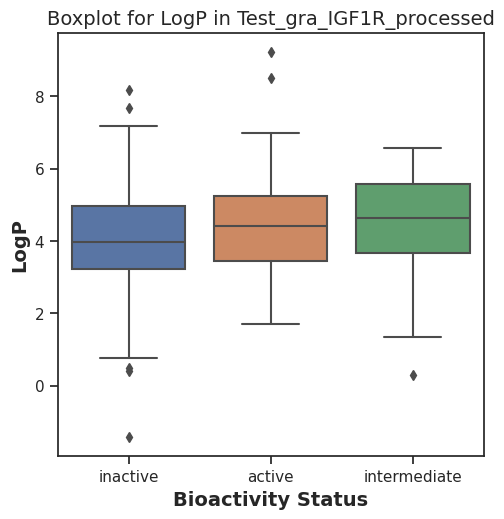

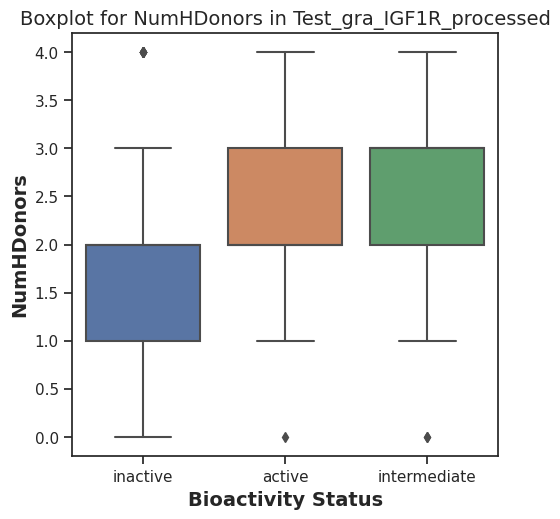

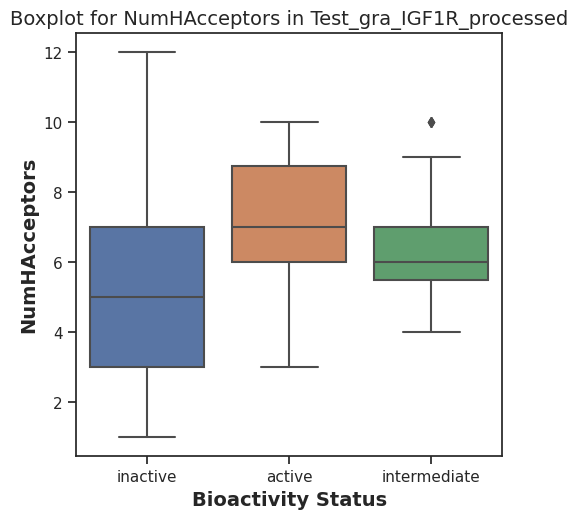

In [ ]:
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

# Define a function to perform the Mann-Whitney U test and create boxplots
def mannwhitney_and_boxplot(dataframe, descriptor, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    # Seed the random number generator
    seed(42)

    # Create a selection of the descriptor and bioactivity_status
    selection = [descriptor, 'bioactivity_status']
    df = dataframe[selection]

    # Separate the data into active, intermediate, and inactive groups
    active = df[df['bioactivity_status'] == 'active'][descriptor]
    intermediate = df[df['bioactivity_status'] == 'intermediate'][descriptor]
    inactive = df[df['bioactivity_status'] == 'inactive'][descriptor]

    # Check if both 'active' and 'inactive' groups have data for the descriptor
    if active.size == 0 or inactive.size == 0:
        print(f"Skipping {descriptor} for {dataframe.name}: Not enough data for Mann-Whitney U test.")
        return

    # Perform Mann-Whitney U test for active vs. inactive
    stat_active_inactive, p_active_inactive = mannwhitneyu(active, inactive)

    # Interpret the results
    alpha = 0.05
    if p_active_inactive > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    # Create a results dataframe and save it to a CSV file
    results = pd.DataFrame({
        'Descriptor': descriptor,
        'Statistics (Active vs. Inactive)': stat_active_inactive,
        'p-value (Active vs. Inactive)': p_active_inactive,
        'Interpretation (Active vs. Inactive)': interpretation
    }, index=[0])

    # Save the results to a CSV file
    filename = 'results/' + 'mannwhitneyu_' + descriptor + '_' + dataframe.name + '.csv'
    results.to_csv(filename)

    #----------boxplots----------#

    # Create a boxplot
    plt.figure(figsize=(5.5, 5.5))
    sns.boxplot(x='bioactivity_status', y=descriptor, data=dataframe)
    plt.xlabel('Bioactivity Status', fontsize=14, fontweight='bold')
    plt.ylabel(descriptor, fontsize=14, fontweight='bold')
    plt.title('Boxplot for ' + descriptor + ' in ' + dataframe.name, fontsize=14)

    # Save the boxplot as a PDF file
    plt.savefig('results/' + dataframe.name + '_boxplot_' + descriptor + '.pdf')

# Define the descriptors to be analyzed
descriptors = ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

# List of dataframes to analyze
dataframes = [Train_IGF1R_processed, Test_gra_IGF1R_processed, Test_les_IGF1R_processed]

# Assign names to the dataframes
dataframes[0].name = "Train_IGF1R_processed"
dataframes[1].name = "Test_gra_IGF1R_processed"
dataframes[2].name = "Test_les_IGF1R_processed"

for dataframe in dataframes:
    print(f"Analyzing {dataframe.name}...")
    for descriptor in descriptors:
        mannwhitney_and_boxplot(dataframe, descriptor)
    print(f"{dataframe.name} analysis completed.\n")

print("Analysis for all dataframes completed.")


In [ ]:
import os
import glob
import pandas as pd

# Folder containing Mann-Whitney U test results CSV files
results_folder = '/content/results/'

def combine_mannwhitney_results(dataframe_name):
    # Get a list of all Mann-Whitney U test results CSV files for the given dataframe
    files = glob.glob(os.path.join(results_folder, f'mannwhitneyu_*_{dataframe_name}.csv'))

    # Create an empty DataFrame to store the combined results
    combined_results = pd.DataFrame()

    # Read each file and append it to the combined_results DataFrame
    for file in files:
        df = pd.read_csv(file)
        combined_results = combined_results.append(df, ignore_index=True)

    # Save the combined results to a single CSV file for the given dataframe
    combined_results.to_csv(os.path.join( f'mannwhitneyu_combined_{dataframe_name}.csv'), index=False)

# Combine Mann-Whitney results for Train_IGF1R_processed
combine_mannwhitney_results('Train_IGF1R_processed')

# Combine Mann-Whitney results for Train_IGF1R_processed
combine_mannwhitney_results('Test_gra_processed')

# Combine Mann-Whitney results for Train_IGF1R_processed
combine_mannwhitney_results('Test_les_processed')

<ipython-input-100-d67cd860ca5f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results = combined_results.append(df, ignore_index=True)
<ipython-input-100-d67cd860ca5f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results = combined_results.append(df, ignore_index=True)
<ipython-input-100-d67cd860ca5f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results = combined_results.append(df, ignore_index=True)
<ipython-input-100-d67cd860ca5f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_results = combined_results.append(df, ignore_index=True)
<ipython-input-100-d67cd860ca5f>:18: FutureWarni

In [ ]:
import os
import glob

# Folder containing Mann-Whitney U test results CSV files
results_folder = '/content/results/'

# Files to keep
files_to_keep = [
    'mannwhitneyu_combined_Test_les_processed.csv',
    'mannwhitneyu_combined_Test_gra_processed.csv',
    'mannwhitneyu_combined_Train_IGF1R_processed.csv'
]

# Get a list of all Mann-Whitney U test results CSV files
all_files = glob.glob(os.path.join(results_folder, 'mannwhitneyu_*.csv'))

# Delete files that start with 'mannwhitneyu_' and are not in files_to_keep
for file in all_files:
    file_name = os.path.basename(file)
    if file_name.startswith('mannwhitneyu_') and file_name not in files_to_keep:
        os.remove(file)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
# Step 1: Create a zip folder called IGF1R_EDA and save content/model, content/results, and content/smiles folders
!zip -r IGF1R_EDA.zip /content/model /content/results /content/smiles  /content/Test_gra_IGF1R_raw.csv /content/Test_les_IGF1R_raw.csv /content/Train_IGF1R_raw.csv /content/Train_QSAR.csv

In [ ]:
! zip -r IGF1-R_EDA_results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 10%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: IGF1R_02_bioactivity_data_class_pIC50_updated.csv (deflated 80%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: IGF1R_02_bioactivity_data_class_pIC50.csv (deflated 80%)
  adding: IGF1R_03_bioactivity_data_class_curated.csv (deflated 85%)


In [ ]:
import sklearn